### Figure 1 graphs

In [1]:
from matplotlib import pyplot as plt
import pandas as ps
import numpy as np
import math as m

def getHeatMap(fname, force):
    mod =  np.delete(np.array(ps.read_csv('./compiledRuns/' + fname + '/heatmap_' + str(force) + '.txt',header=1)), 0, axis=1)
    mod = np.delete(mod, len(mod[0])-1,axis=1)
    return mod
def getDenProf(fname, force):
    return np.array(ps.read_csv('./compiledRuns/' + fname + '/ProfileDensity_' + str(force) + '.txt',header=1))
def genPotential(dim, rez):
    x = np.linspace(0,dim[0],rez[0])
    potential = np.cos(m.pi * 2 /dim[0] * x)
    for i in range(rez[1]):
        potential= np.vstack([potential,np.cos(m.pi * 2 * x)])
    return potential
    

In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alexander/.local/lib/python3.6/site-packages/matplo

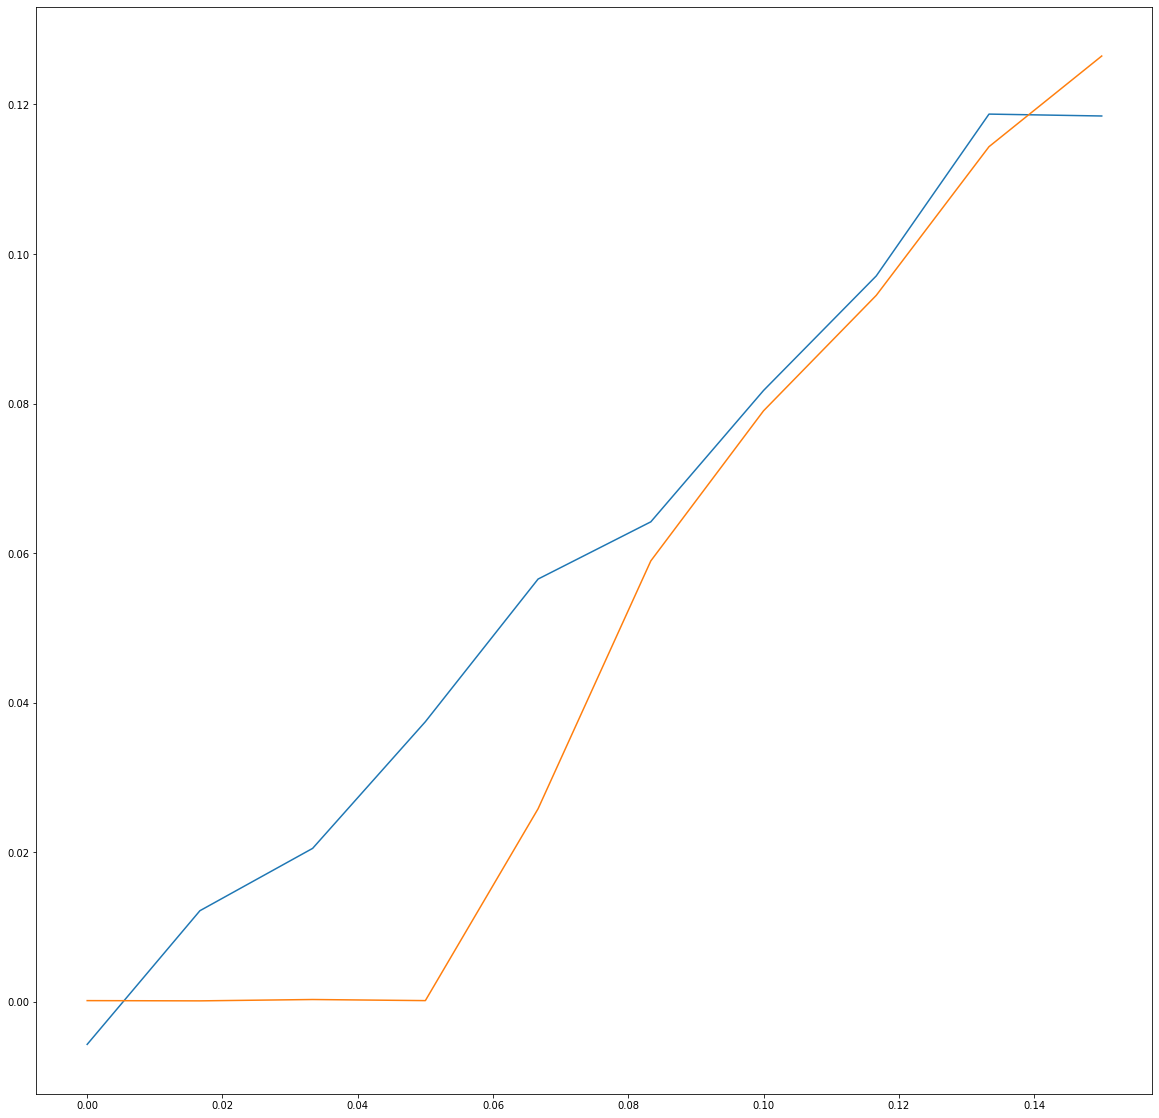

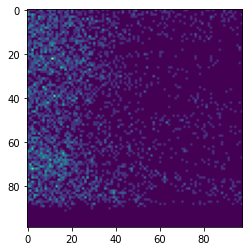

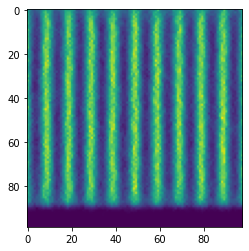

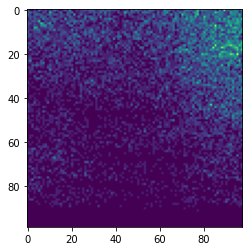

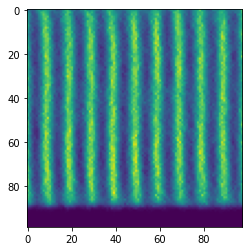

In [4]:
figure_1_folders = ['1','10000']
fig1data = []
fig1heatmaps = [[],[]]
for name in figure_1_folders:
    fig1data.append(np.array(ps.read_csv('./compiledRuns/' + name + '/data.txt',header = 0)))
    fig1heatmaps[0].append(getHeatMap(name,0.0))
    fig1heatmaps[1].append(getHeatMap(name,1.2))
    
fig = plt.figure(figsize=(20,20))
for data in fig1data:
    forceangle = np.linspace(0,3,10)/20
    plt.errorbar(forceangle, data[3][1:])
plt.savefig("compvalues.png", transparent = True)
for mp in fig1heatmaps:
    fig = plt.figure()
    plt.imshow(mp[0])
    fig = plt.figure()
    plt.imshow(mp[1])

In [57]:

fig_width = 3.46  # width in inches : 85 mm one-column format
fig_height = fig_width*3./4.      # height in inches
fig_size =  [fig_width,fig_height]
params = {
            #~ 'backend': 'PDF',

          
          'axes.labelsize': 9,
          'axes.labelpad':1,
          'axes.linewidth':.1,
          'font.size': 11,
          'legend.fontsize': 9,
          'xtick.labelsize': 7,
          'ytick.labelsize': 7,
          
          'figure.subplot.left' : 0.16,
          'figure.subplot.right' : 0.97,
          'figure.subplot.bottom' : 0.13,
          'figure.subplot.top' : 0.9,
          #~ 'figure.subplot.wspace' : 0.3,
          
          'legend.labelspacing' : 0.2,
          'legend.handletextpad' : 0.4,
          'legend.borderpad' : 0.,
          'legend.frameon': False,
          'legend.numpoints' : 1,
          'legend.columnspacing' : 1,
         
          'lines.linewidth' : 1.4,
          'lines.markersize' : 4,
          'lines.markeredgewidth' : .4,  

          'xtick.major.pad' : 2, 
          'ytick.major.pad' : 2, 
    
          'figure.figsize': fig_size,
          
          #'text.usetex' : True,
          'font.family' : 'sans-serif',
          'font.serif' : 'DejaVu Sans',
          'mathtext.fontset' : 'dejavusans',
          # 'mathtext.it' : 'serif:italic',
          # 'mathtext.default' : 'it',
          
          'xtick.major.size' : 2,
          'ytick.major.size' : 2
          }
plt.rcParams.update(params)

dblfigsize=(7.1,2.7)

    
def colormu(mu,colormap='inferno',muvals=[0.4,0.7,1.0,1.3,1.7]):
    # space out values
    # muvals=[0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.5,3.0,4.0]
    # muvals = [0.4,0.7,1.0,1.3,1.6]
    muidx = dict([])
    for m in muvals:
        muidx[m] = np.searchsorted(muvals,mu)
    
    cfunc = matplotlib.cm.get_cmap(colormap)
    cnorm = matplotlib.colors.Normalize(vmin=0,vmax=len(muvals))
    # print 'color', mu, cfunc(cnorm(muidx[mu]))

    return cfunc(cnorm(muidx[mu]))
    
def colormu2(mu,colormap='viridis',muvals=[0.5,1.0,1.5,2.0,2.5,3.0]):
    # space out values
    # muvals=[0.5,1.0,1.5,2.0,2.2,2.4,2.5,2.6,2.8,3.0,3.5,4.0,6.0]
    # muvals=[1.0,1.5,2.0,2.5,3.0]
    muidx = dict([])
    for m in muvals:
        muidx[m] = np.searchsorted(muvals,mu)
    
    cfunc = matplotlib.cm.get_cmap(colormap)
    cnorm = matplotlib.colors.Normalize(vmin=0,vmax=len(muvals))
    # print 'color', mu, cfunc(cnorm(muidx[mu]))

    return cfunc(cnorm(muidx[mu]))

axl = .08
axb = .16
axw = .38
axh = .74

axd = (1-axl-2*axw)/1.7

def dblpanelfig(figsize=dblfigsize,axl=axl,axb=axb,axw=axw,axh=axh,axd=axd):
    plt.figure(figsize=figsize)

    ax1,ax2 = [plt.axes([axl,axb,axw,axh]),
               plt.axes([axl+axw+axd,axb,axw,axh])]

    return ax1, ax2

# common data folder
dataprefix = '../data/'

def smalldblpanel():
    return dblpanelfig(figsize=(fig_width,fig_height*.6),axl=.14,axb=.2,axw = axw*.97,axh=axh*.97)

# symbols
syms1d = {0.7:'>',1.0: '^', 1.3: 'v', 1.7: '<'}
syms2d = {1.5: 's', 2.0: 'o', 2.5: '*'}

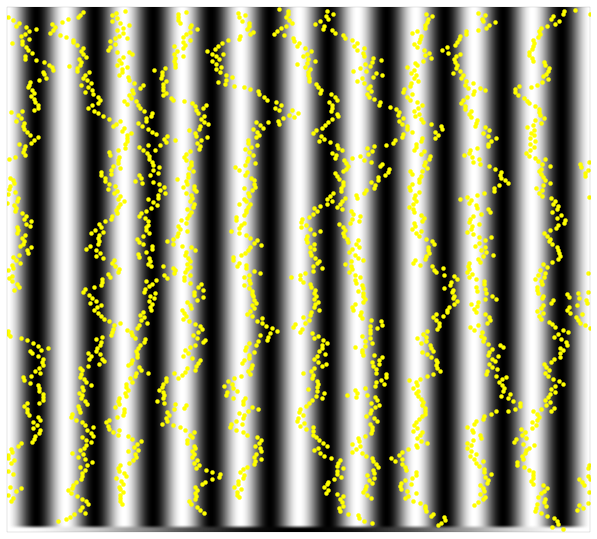

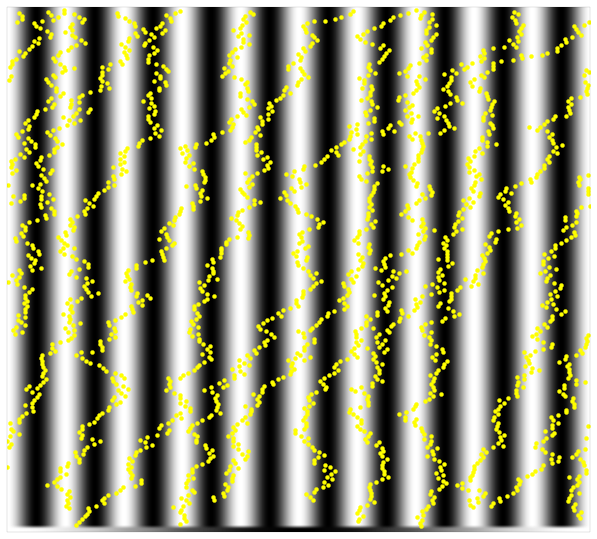

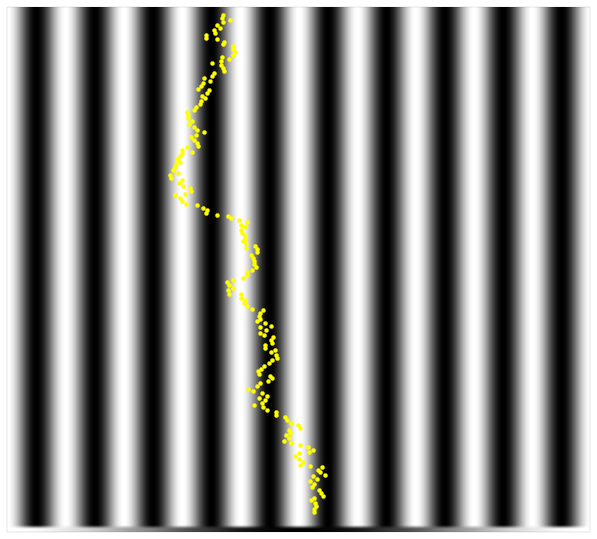

In [72]:
foldernames = ["profiledata_nosheer_sheer_0","profiledata_sheer_sheer_2","profiledatasingle_sheer_0"]
for name in foldernames:
    data = np.array(ps.read_csv(name + "/profileData_0.000000.txt"))
    np.flip(data,0)
    fig = plt.figure(figsize=(10,10))
    plt.imshow(genPotential((10,3),(1000,100)),cmap='gray',origin='lower',extent=[5,-5,-15,-51])
    plt.plot(data[:,0],data[:,1],'o',color='yellow')
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.gca().set_aspect(0.25)
    
    plt.savefig(f"{name}.png")

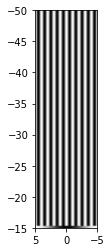

In [50]:
plt.imshow(genPotential((10,3),(100,100)),cmap='gray',origin='lower',extent=[5,-5,-15,-50])